<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


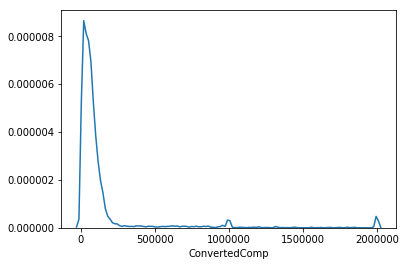

In [21]:
# your code goes here
import seaborn as sns
graph_df = df['ConvertedComp']
sns.distplot(graph_df, kde=True, hist=False)



Plot the histogram for the column `ConvertedComp`.


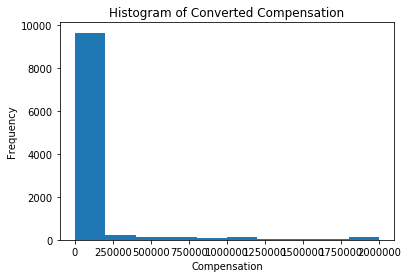

In [5]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt

df['ConvertedComp'].plot(kind='hist')

plt.title('Histogram of Converted Compensation')
plt.xlabel('Compensation')

plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
len(df[df['Gender']=='Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
df_man = df[df['Gender']=='Woman']
df_man['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


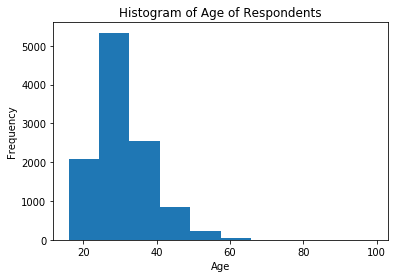

In [10]:
# your code goes here
df['Age'].plot(kind='hist')

plt.title('Histogram of Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


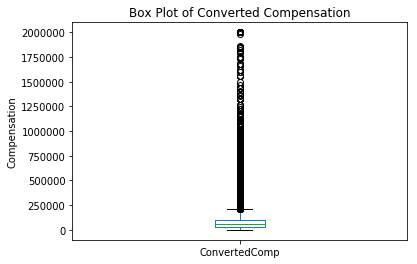

In [11]:
# your code goes here
#mdn = df['ConvertedComp'].median()
#df['ConvertedComp'].fillna(value=mdn, inplace=True)
df['ConvertedComp'].plot(kind='box')

plt.title('Box Plot of Converted Compensation')
plt.ylabel('Compensation')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
import numpy as np

df_mod = df[df['ConvertedComp'].notna()==True]

ub = np.percentile(df_mod['ConvertedComp'], 75)
lb = np.percentile(df_mod['ConvertedComp'], 25)

iqr = ub-lb

iqr

73132.0

Find out the upper and lower bounds.


In [13]:
# your code goes here

print(ub,lb)

100000.0 26868.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# Calculating number of upper outliers
up_outlier = ub + (1.5 * iqr)

# Calculating the number of lower outliers
low_outlier = lb - (1.5 * iqr)

df_outliers = df_mod[df_mod['ConvertedComp']>up_outlier]
len(df_outliers['ConvertedComp'])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# your code goes here
df_no_outliers = df_mod[df_mod['ConvertedComp']<up_outlier]
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
import numpy as np
df_num_cols = df.select_dtypes(include=np.number)
df_num_cols.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
